<a href="https://colab.research.google.com/github/sandovalleonel3-cloud/ProyectoDSCoderHouse-Sandoval/blob/main/Data_StoryTellingSandoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PROYECTO DS CODERHOUSE***

En este collab se trabajara con los datos obtenidos en un dataset extraido de kaggle por recomendacion de los profesores. El mismo tiene datos respecto a los clientes de un shopping general en los que se detalla edad, genero, tipo de producto comprado, localidad, el gasto en dolares, entre otras variables que se pueden observar mas abajo.

Comenzamos por importar el archivo desde google drive y al ser un archivo zip tuve que ejecutarlo de la siguiente manera:

In [29]:
from google.colab import drive
import zipfile
import pandas as pd

drive.mount('/content/drive', force_remount=True)
zip_path = '/content/drive/MyDrive/ProyectoDSCoderHouse/Shopping_Behaviour.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
!ls /content/
df = pd.read_csv('/content/shopping_behavior_updated.csv')
df.head()


Mounted at /content/drive
categorias_transparente.png  drive  sample_data  shopping_behavior_updated.csv


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Comienzo observando la distribucion del gasto en relacion a la edad y el gnero de los clientes:

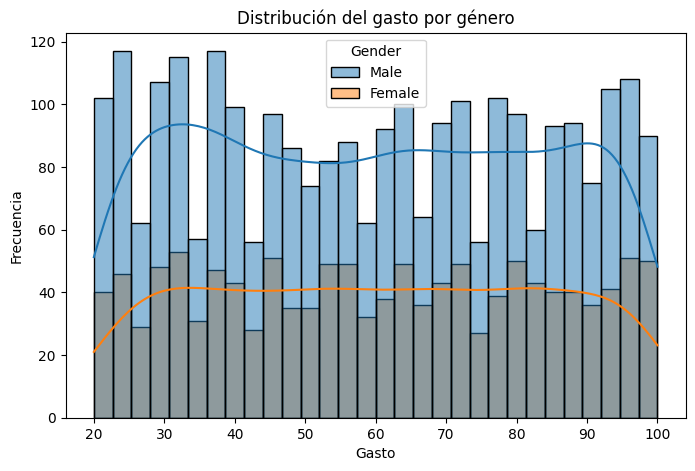

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Purchase Amount (USD)', hue='Gender', bins=30, kde=True, alpha=0.5)
plt.title('Distribución del gasto por género')
plt.xlabel('Gasto')
plt.ylabel('Frecuencia')
plt.show()


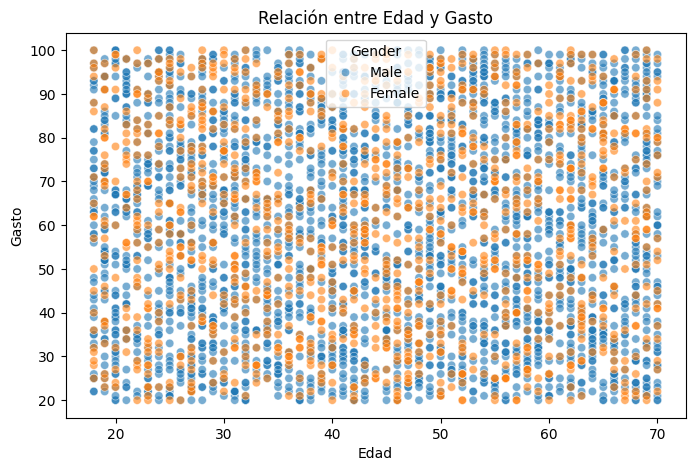

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender', alpha=0.6)
plt.title('Relación entre Edad y Gasto')
plt.xlabel('Edad')
plt.ylabel('Gasto')
plt.show()


Ahora me fijo que productos son los mas vendidos individualmente y por categoria, generando un porcentaje de la ultima:

In [32]:
#Conteo de Productos
Productos_Mas_Vendidos = df['Item Purchased'].value_counts()
print(Productos_Mas_Vendidos)

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


In [33]:
#Conteo por Categoria
categorias_mas_vendidas = df['Category'].value_counts()
print(categorias_mas_vendidas)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


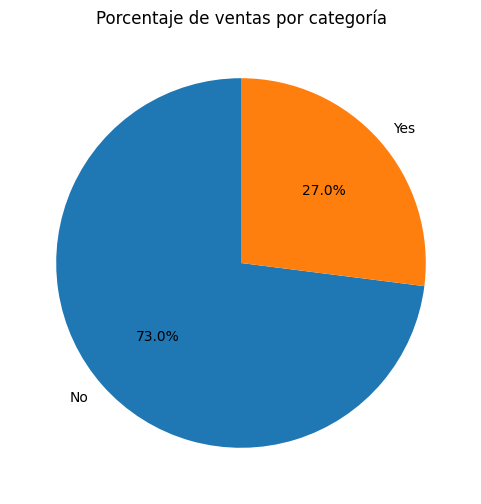

In [34]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de ventas por categoría')
plt.savefig('categorias_transparente.png', transparent=True, dpi=300)
plt.show()


Continuo tratando ge observar un perfil que se repita entre 4 tipos de factores "Age","Genre","Subscription Status" y "Frequency of Purchases":

In [35]:
# Agrupar combinaciones de variables
perfil_gasto = df.groupby(['Age', 'Gender', 'Subscription Status', 'Frequency of Purchases'])['Purchase Amount (USD)'].mean().reset_index()

# Para ver los perfiles que gastan mmas
perfil_gasto = perfil_gasto.sort_values(by='Purchase Amount (USD)', ascending=False)
print(perfil_gasto.head(10))


      Age  Gender Subscription Status Frequency of Purchases  \
397    37    Male                 Yes                Monthly   
618    48    Male                  No                 Weekly   
81     22  Female                  No            Fortnightly   
753    55  Female                  No            Fortnightly   
1019   68  Female                  No                 Weekly   
909    62    Male                 Yes            Fortnightly   
4      18  Female                  No              Quarterly   
90     22    Male                  No              Quarterly   
925    63    Male                  No                 Weekly   
758    55    Male                  No              Bi-Weekly   

      Purchase Amount (USD)  
397                   100.0  
618                   100.0  
81                    100.0  
753                    99.0  
1019                   99.0  
909                    98.5  
4                      97.0  
90                     97.0  
925                    96

Obtengo las medidas comunes de mediana, rango y promedio, luego distribuyo el gasto en relacion a la cantidad de compras para observar en que rango gastan mas los clientes:

Mediana: 60.0
Promedio: 59.76435897435898
Rango: 80


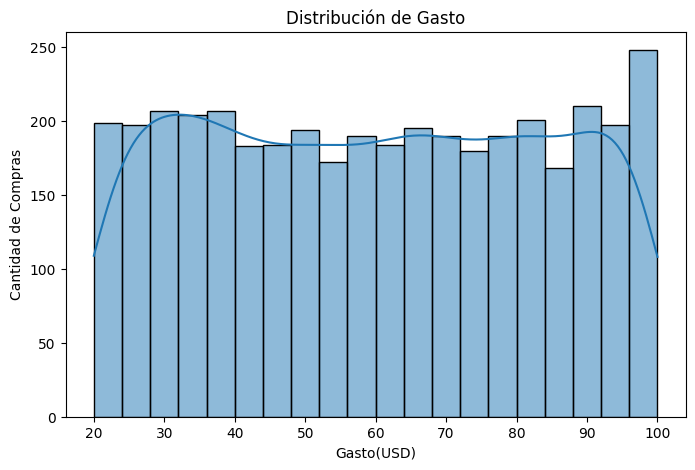

In [36]:
Gasto = 'Purchase Amount (USD)'

# Medidas
mediana = df[Gasto].median()
promedio = df[Gasto].mean()
rango = df[Gasto].max() - df[Gasto].min()
print("Mediana:", mediana)
print("Promedio:", promedio)
print("Rango:", rango)

#Grafico de distribución del gasto
plt.figure(figsize=(8,5))
sns.histplot(df[Gasto], bins=20, kde=True)
plt.title('Distribución de Gasto')
plt.xlabel('Gasto(USD)')
plt.ylabel('Cantidad de Compras')
plt.show()

Ahora quiero observar que combinacion es mas frecuente al tner en cuenta "Category", "Season" , "Shipping Type" y genero grafico de barras a partir de esto:

10 combinaciones más frecuentes:
    Category  Season  Shipping Type  Total_Purchases
32  Clothing  Spring  Free Shipping               83
45  Clothing  Winter   Next Day Air               82
25  Clothing    Fall        Express               80
27  Clothing    Fall   Next Day Air               80
46  Clothing  Winter       Standard               80
35  Clothing  Spring   Store Pickup               79
31  Clothing  Spring        Express               79
28  Clothing    Fall       Standard               77
41  Clothing  Summer   Store Pickup               76
47  Clothing  Winter   Store Pickup               76

 La combinación más frecuente es:
Categoría: Clothing, Temporada: Spring, Tipo de envío: Free Shipping → Total de compras: 83


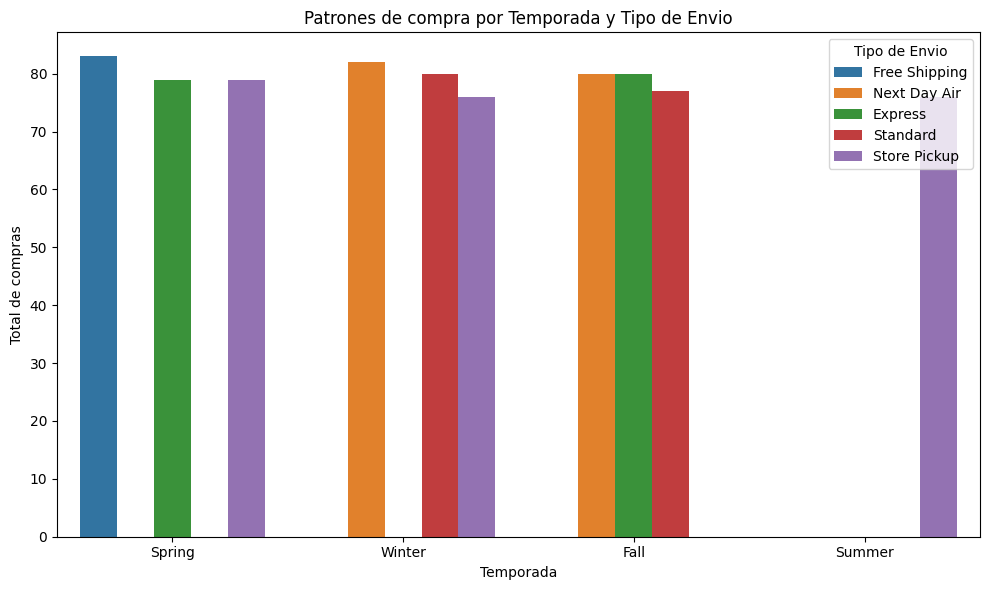

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Agrupacion, conteo y ordenanza
patrones = df.groupby(['Category', 'Season', 'Shipping Type']).size().reset_index(name='Total_Purchases')
patrones = patrones.sort_values(by='Total_Purchases', ascending=False)

#Combinaciones mas frecuentes
print("10 combinaciones más frecuentes:")
print(patrones.head(10))

# Combinacion mas comun
mas_comun = patrones.iloc[0]
print("\n La combinación más frecuente es:")
print(f"Categoría: {mas_comun['Category']}, Temporada: {mas_comun['Season']}, Tipo de envío: {mas_comun['Shipping Type']} → Total de compras: {mas_comun['Total_Purchases']}")

#Visualizacion
plt.figure(figsize=(10,6))
sns.barplot(
    data=patrones.head(10),
    x='Season',
    y='Total_Purchases',
    hue='Shipping Type'
)
plt.title('Patrones de compra por Temporada y Tipo de Envio')
plt.xlabel('Temporada')
plt.ylabel('Total de compras')
plt.legend(title='Tipo de Envio')
plt.tight_layout()
plt.show()

Ahora quise observar la relacion entre la frecuencia de compra y la reseña final de los clientes sin embargo no hay una diferencia significativa entre las frecuencias por lo que esto al final no fue tenido en cuenta en la presentacion:

In [38]:
import pandas as pd
# Estadistica por grupo
rating_por_frecuencia = df.groupby('Frequency of Purchases')['Review Rating'].agg(['mean', 'median', 'count']).reset_index()
print("Estadistica de Reseña por Frecuencia:")
print(rating_por_frecuencia)

# Categoria con rating mas alto
max_rating = rating_por_frecuencia.loc[rating_por_frecuencia['mean'].idxmax()]
print("\n La categoria con mayor promedio de rating es:")
print(f"Frequency: {max_rating['Frequency of Purchases']}, Promedio de Rating: {max_rating['mean']}")


Estadistica de Reseña por Frecuencia:
  Frequency of Purchases      mean  median  count
0               Annually  3.755944     3.7    572
1              Bi-Weekly  3.706947     3.7    547
2         Every 3 Months  3.767295     3.8    584
3            Fortnightly  3.755166     3.7    542
4                Monthly  3.776311     3.8    553
5              Quarterly  3.727531     3.6    563
6                 Weekly  3.759555     3.8    539

 La categoria con mayor promedio de rating es:
Frequency: Monthly, Promedio de Rating: 3.776311030741411


Ahora quiero observar la cantidad, porcentaje y gasto promedio de los clientes suscriptos vs no suscriptos:

Cantidad de clientes por estado de suscripcion:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

 Porcentaje de clientes por estado de suscripcion:
Subscription Status
No     73.0
Yes    27.0
Name: proportion, dtype: float64

 Gasto promedio según estado de suscripción:
  Subscription Status       mean  median  count
0                  No  59.865121    60.0   2847
1                 Yes  59.491928    60.0   1053


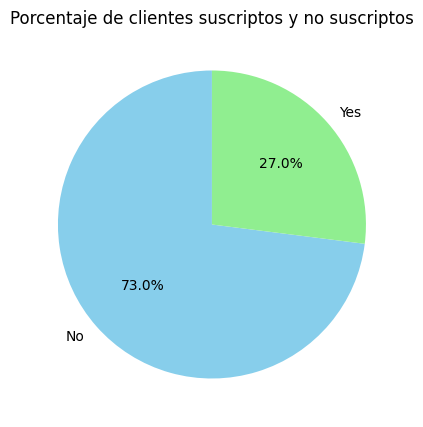

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Porcentaje de clientes suscriptos vs no suscriptos
suscripcion_count = df['Subscription Status'].value_counts()
suscripcion_pct = df['Subscription Status'].value_counts(normalize=True) * 100
print("Cantidad de clientes por estado de suscripcion:")
print(suscripcion_count)
print("\n Porcentaje de clientes por estado de suscripcion:")
print(suscripcion_pct)

# Gasto promedio por suscripcion
gasto_por_suscripcion = df.groupby('Subscription Status')['Purchase Amount (USD)'].agg(['mean', 'median', 'count']).reset_index()
print("\n Gasto promedio según estado de suscripción:")
print(gasto_por_suscripcion)

#Visualizacion
counts = df['Subscription Status'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Porcentaje de clientes suscriptos y no suscriptos')
plt.show()


Segui por generar un modelo ANOVA para ver la relacion entre el gasto, metodo de pago y tipo de envio pero al final dio un resultado cercano a 1 por lo que no se puede observar una gran relacion asi que al final no fue tenido en cuenta:

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo de ANOVA
model = ols('Q("Purchase Amount (USD)") ~ C(Q("Payment Method")) + C(Q("Shipping Type")) + C(Q("Payment Method")):C(Q("Shipping Type"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                                    sum_sq      df         F  \
C(Q("Payment Method"))                        1.599276e+03     5.0  0.567787   
C(Q("Shipping Type"))                         3.237576e+03     5.0  1.149429   
C(Q("Payment Method")):C(Q("Shipping Type"))  5.847687e+03    25.0  0.415218   
Residual                                      2.176731e+06  3864.0       NaN   

                                                PR(>F)  
C(Q("Payment Method"))                        0.724791  
C(Q("Shipping Type"))                         0.331817  
C(Q("Payment Method")):C(Q("Shipping Type"))  0.995438  
Residual                                           NaN  


Finalmente quise observar una relacion entre el gasto actual y previo en relacion a un descuento aplicado, pero como se puede observar en el grafico no existe una gran relacion por lo que al final tampoco fue tenido en cuenta:

Correlaciones generales:
                        Purchase Amount (USD)  Previous Purchases  \
Purchase Amount (USD)               1.000000            0.008063   
Previous Purchases                  0.008063            1.000000   
Discount Applied                   -0.017798            0.023537   

                       Discount Applied  
Purchase Amount (USD)         -0.017798  
Previous Purchases             0.023537  
Discount Applied               1.000000   

Correlacion con descuento: 0.00
Correlacion sin descuento: 0.01


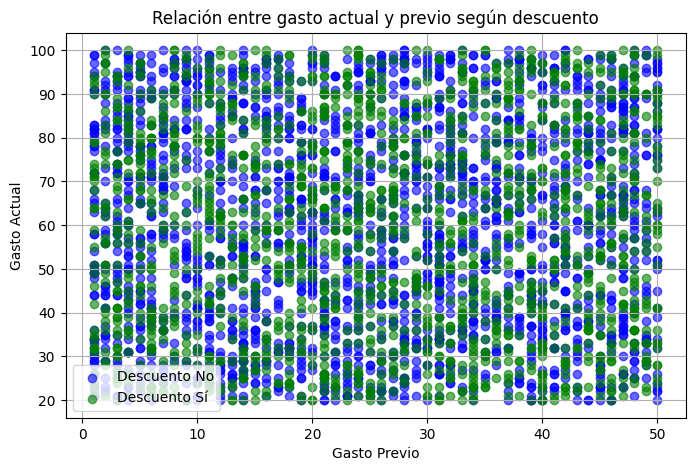

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
#Convierto la columna Discount Applied a numerica
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})

#correlacion general
corr_general = df[['Purchase Amount (USD)', 'Previous Purchases', 'Discount Applied']].corr()
print("Correlaciones generales:\n", corr_general, "\n")

#Veo si el descuento cambia la relacion
corr_yes = df[df['Discount Applied'] == 1][['Purchase Amount (USD)', 'Previous Purchases']].corr().iloc[0,1]
corr_no = df[df['Discount Applied'] == 0][['Purchase Amount (USD)', 'Previous Purchases']].corr().iloc[0,1]

print(f"Correlacion con descuento: {corr_yes:.2f}")
print(f"Correlacion sin descuento: {corr_no:.2f}")

#Grafico de scatter plot separado por descuento
plt.figure(figsize=(8,5))
colors = {1: 'green', 0: 'blue'}
for d in [0,1]:
    subset = df[df['Discount Applied'] == d]
    plt.scatter(subset['Previous Purchases'], subset['Purchase Amount (USD)'],
                label=f"Descuento {'Sí' if d==1 else 'No'}",
                alpha=0.6, c=colors[d])
plt.xlabel("Gasto Previo")
plt.ylabel("Gasto Actual")
plt.title("Relación entre gasto actual y previo según descuento")
plt.legend()
plt.grid(True)
plt.show()


Para finalizar, con estos datos que obtuve se relizo la presentacion.